In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

## Requirements 1-7

In [123]:
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)

y = y.reshape((-1,1))

# REQUIREMENT 1: ------------------------------------------------------------------------
y[y==0] = -1 # Relabel the Y targets to +1 and -1

# REQUIREMENT 2: ------------------------------------------------------------------------
# Split data into training and testing datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# REQUIREMENTS 3-5: ------------------------------------------------------------------------

HINGE_LOSS = [] # Array to store hinge loss for each epoch

def mini_batch_descent(lRate, C, X_, y_, batch_size, epochs):
  rows = X_.shape[0]
  cols = X_.shape[1]
  w = np.zeros((cols, 1)) # Initialize w and b
  b = 0
  for _ in range(epochs):
    # Shuffle the dataset in each epoch:
    indices = np.arange(rows)
    np.random.shuffle(indices)
    X_shuffled = X_[indices]
    y_shuffled = y_[indices]
    batch_losses = 0 # Stores the total loss for an epoch
    for i in range(0, rows, batch_size): # Iterate in increments of batch_size
      dw = np.zeros((cols,1))
      db = 0

      for j in range(i, min(i + batch_size, rows)): # Mini batch
        inner = y_shuffled[j] * (np.dot(X_shuffled[j], w) + b)
        loss = np.maximum(0, 1 - inner)
        batch_losses += loss[0] # Add loss for each iteration to total for each epoch
        if np.maximum(0, inner) < 1:
          dw += w - C * y_shuffled[j] * np.array(X_shuffled[j]).reshape(-1,1)
          db += -C * y_shuffled[j]
        else:
          dw += w

      w -= lRate * (dw / rows + w / rows) # Update w and b after each mini batch is complete. Added regularization term as well.
      b -= lRate * db / batch_size

    # Calculate regularized Hinge Loss and append to global array for Requirement 9
    Jw = (1/2)  * np.linalg.norm(w) ** 2 + C * (batch_losses / rows) # Loss function Jw
    HINGE_LOSS.append(Jw)
  return w, b

# Function to calculate predictions:
def predict(X_, w, b):
  return np.sign(np.dot(X_,w) + b)


LEARNING_RATE = 0.006
C = 100
BATCH = 20
EPOCHS = 1000

W, B = mini_batch_descent(LEARNING_RATE, C, X_train, y_train, BATCH, EPOCHS)

# print(W)
# print(B)

# REQUIREMENTS 6-7 ------------------------------------------------------------------------
test_pred = predict(X_test, W, B)
test_accuracy = accuracy_score(y_test, test_pred)

train_pred = predict(X_train, W, B)
train_accuracy = accuracy_score(y_train, train_pred)
print("Test Accuracy = ", test_accuracy)
print("Training Accuracy = ", train_accuracy)

Test Accuracy =  0.88
Training Accuracy =  0.89


## Requirement 8, Visualize training data and decision boundary in 3D

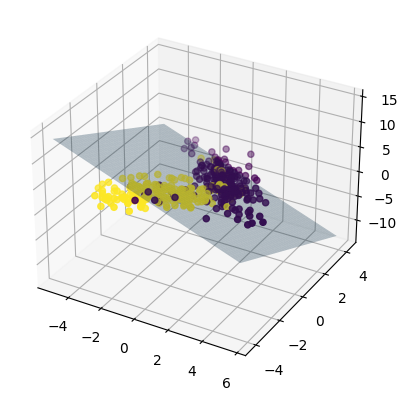

In [121]:
# Generate mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Decision boundary
zz = (-W[0] * xx - W[1] * yy - B) * 1. / W[2]

# Plot training data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train.flatten(), cmap='viridis', marker='o')

ax.plot_surface(xx, yy, zz, alpha=0.3) # Plot decision boundary
plt.show()


## Requirement 9, Visualize the loss function over time

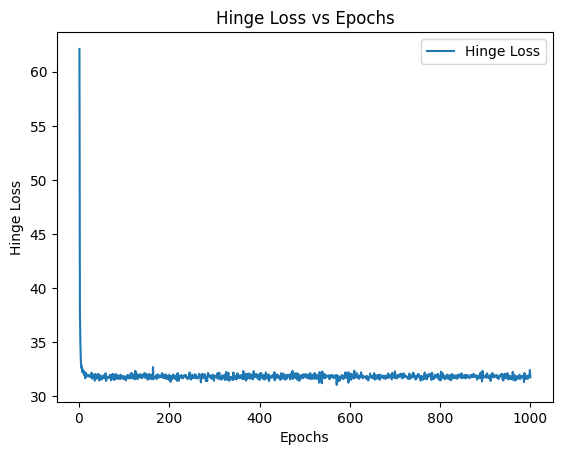

In [122]:
x_axis = range(1, len(HINGE_LOSS) + 1)

# Plot HINGE_LOSS
plt.plot(x_axis, HINGE_LOSS, label='Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss vs Epochs')
plt.legend()
plt.show()